In [63]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io
import time

from scipy.interpolate import CubicSpline

plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [64]:
path_array = [r"C:/Users/nicol/Experimentel Physics/Experimentel-Physics-2/Mach-Zender/Refractive index", 
              r"/Users/karsten/eksperimental/Experimentel-Physics-2/Mach-Zender/Refractive index"]

def get_data(entries):
    data = io.loadmat(path_array[0] + entries)
        
    length = data.get("Length")[0][0]
    Tinterval = data.get("Tinterval")[0][0]
    Tstart = data.get("Tstart")[0][0]
    
    t = np.arange(Tstart, Tinterval*length, Tinterval)
    V = np.transpose(data.get("A"))[0]
    
    return t, V

t05, V05 = get_data(r"/0.5 bar.mat")
t1, V1 = get_data(r"/1 bar.mat")
t15, V15 = get_data(r"/1.5 bar.mat")
t2, V2 = get_data(r"/2 bar.mat")
                    

Text(0.5, 1.01, 'Measured intensity during pressure drop')

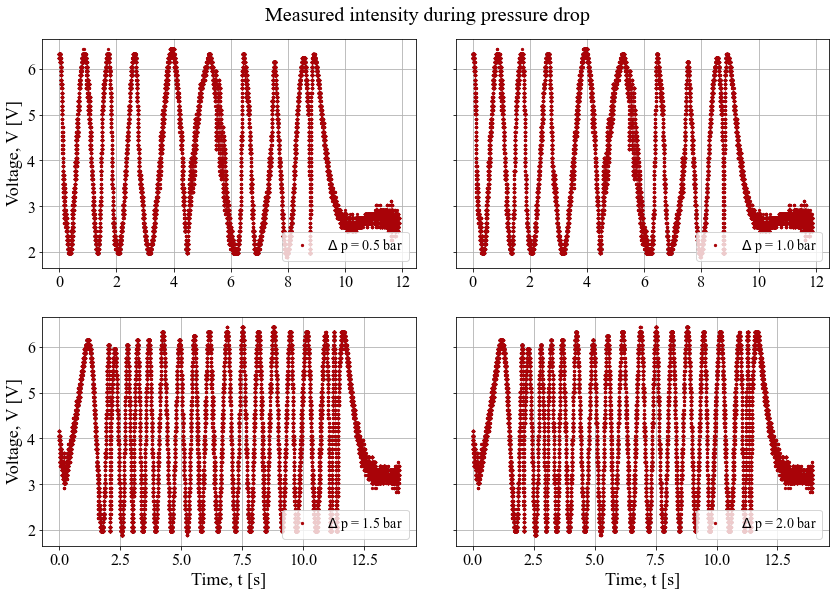

In [70]:
fig, ax = plt.subplots(2, 2, sharey = True, figsize=(12,8))
fig.tight_layout(pad=2.0)

tsize = 14

tV = [[t05, V05], [t1, V1], [t15, V15], [t2, V2]]
dp = [[0.5, 1.0], [1.5, 2.0]]

track = 1
for array, tV_array, dp in zip(ax, tV, dp) : 
    for axs, dp2 in zip(array, dp) :
        axs.plot(tV_array[0], tV_array[1], '.', label="$\Delta$ p = {} bar".format(dp2), color='#a90308', markersize=4.5)
        axs.legend(loc = 'lower right', prop={'size':14})
        axs.grid()
        if track == 3 or track == 4 :
            axs.set_xlabel("Time, t [s]")
        if track == 1 or track == 3 : 
            axs.set_ylabel("Voltage, V [V]")
        track += 1
    
fig.suptitle("Measured intensity during pressure drop", size = 20, y = 1.01)


59388 59388
<class 'scipy.interpolate._cubic.CubicSpline'>


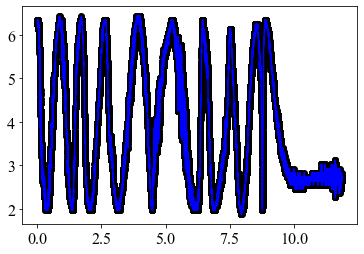

In [4]:
t05 = t05[0:len(t05):1]
V05 = V05[0:len(V05):1]

print(len(t05), len(V05))

cs = CubicSpline(t05, V05)

print(type(cs))

spline = cs(t05)

plt.plot(t05, V05, 'ko')
plt.plot(t05, spline, '-', color = 'blue')

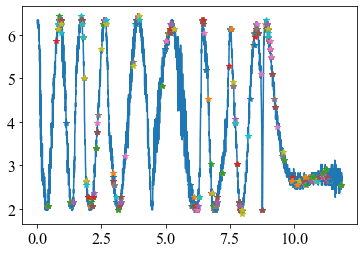

In [5]:
s_deriv = cs(t05, 1)

index = []
tolerance = 1e-8

for i, data in enumerate(s_deriv) : 
    if data < tolerance and data > -tolerance : 
        index.append(i)

plt.plot(t05, V05)
for i in index : 
    plt.plot(t05[i], V05[i], '*')


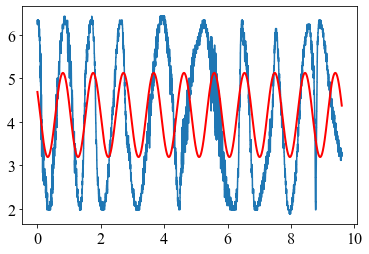

In [6]:
import numpy, scipy.optimize

t05 = t05[0:48000]
V05 = V05[0:48000]

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

res = fit_sin(t05, V05)

plt.plot(t05, V05)
plt.plot(t05, res["fitfunc"](t05), "r-", label="y fit curve", linewidth=2)



In [7]:
ary = [1,2,3,4,5,6]
print(ary[0:len(ary):2])

[1, 3, 5]


In [8]:
def second(t, *p) : 
    a = p[0]
    b = p[1]
    c = p[2]
    d = p[3]
    return a*t**3+b*t**2+c*t+d

def extrema(v_list) : 
    index = []
    slope = np.gradient(v_list)
    tolerance = 0.00001
    checks = 50
    count = 0
    for slope_index in range(len(slope)) : 
        count = 0
        if slope[slope_index] < tolerance and slope[slope_index] > -tolerance :
            append = True
            if count == 0 : 
                index.append(slope_index)
                count += 1
            if count > 0 : 
                for i in range(count) : 
                    k = i + 1
                    if index[-k] != slope_index-k : 
                        append = True
                    else : 
                        append = False
                if append == True : 
                    index.append(slope_index)
                    count += 1
    return index
            

3833
0.33930164225393206
0.3396850339400947
0.8747164361319182
1.326735234117665
1.6359489331596964
2.109054273884388
2.1094376655705505
2.555522196572643
2.5559055882588053
3.1327266842423565
3.133110075928519
3.1334934676146817
3.133876859300844
3.9622029014070836
3.962586293093246
4.477481327609665
5.247148441733021
5.247531833419184
5.247915225105347
5.248298616791509
5.2486820084776715
5.249065400163834
5.249448791849997
6.538811640718672
6.539195032404834
7.01058341469366
7.010966806379822
7.5941055610331905
7.594488952719353
7.954693746021015
7.955077137707178
7.95546052939334
8.689855608389735
8.690239000075897
8.690622391762059
8.691005783448222
9.01803889174495
9.018422283431113
9.018805675117274
39
Time elasped: 0.41374826431274414  s


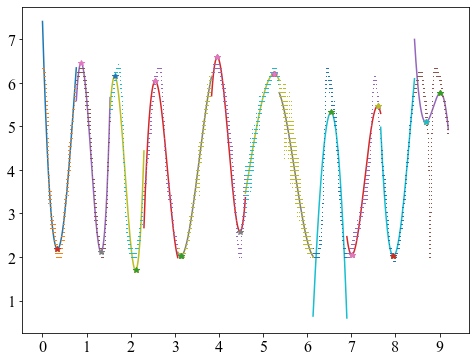

In [9]:
st = time.time()

t1 = t05[0:46000]
v1 = V05[0:46000]

frac = 12
leng = len(t1)
interval = (int) (leng/frac)


print(interval)

number = 0

fig, ax = plt.subplots(figsize=(8,6))

for i in range(frac) :
    
    low = i * interval
    up = (i+1) * interval
    
    t = t1[low: up]
    v = v1[low: up]
    
    guess = [1, 1, 1, 1]
    ##print(len(v))
    ##print(i)
    ##print(up)
    popt, pcov = curve_fit(second, t, v, p0=guess)
    
    t_fit = np.linspace(t[0], t[-1], 2000)
    v_fit = second(t_fit, *popt)
    
    grad = np.gradient(v_fit)
    
    tolerance = 0.00001
    index = []
    for i in range(len(grad)) :
        count = 0
        if grad[i] < tolerance and grad[i] > -tolerance : 
            if count == 0 : 
                index.append(i)
                count += 1
            else : 
                for k in range(len(index)) : 
                    if index[-(k+1)] != i-(k+1) : 
                        append = True
                    else : 
                        append = False
                if append == True : 
                    index.append(i)
                    count += 1
    
    ax.plot(t_fit, v_fit, '-')
    ax.plot(t, v, ',')
    for i in index : 
        print(t_fit[i])
        ax.plot(t_fit[i], v_fit[i], '*')
        number += 1
    
    
ax.set_xticks(np.arange(0, 10, 1))
print(number)

end = time.time()

print("Time elasped:", end-st, " s")
    

In [11]:
if count == 0 : 
                index.append(i)
                count += 1
            if count == 1 :
                if index[-1] != i-1 : 
                    index.append(i)
                    count += 1
            if count == 2 :
                if index[-1] != i-1 and index[-2] != i-2 : 
                    index.append(i)
                    count += 1
            if count == 3 :
                if index[-1] != i-1 and index[-2] != i-2 and index[-3] != i-3 :
                    index.append(i)
                    count += 1    
            if count == 4 : 
                if index[-1] != i-1 and index[-2] != i-2 and index[-3] != i-3 and index[-4] != i-4 : 
                    index.append(i)
                    count += 1
            if count >= 5 :
                if index[-1] != i-1 and index[-2] != i-2 and index[-3] != i-3 and index[-4] != i-4 and index[-5] != i-5 : 
                    index.append(i)
                    count += 1

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

3833
39
Time elasped: 0.21483063697814941  s


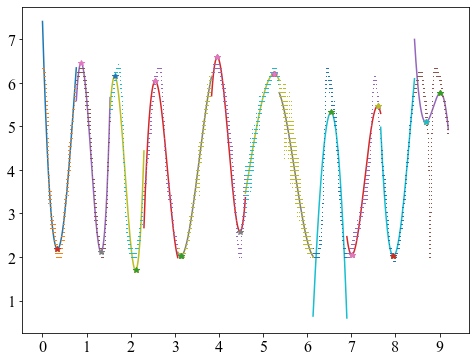

In [12]:
st = time.time()

t1 = t05[0:46000]
v1 = V05[0:46000]

frac = 12
leng = len(t1)
interval = (int) (leng/frac)


print(interval)

number = 0

fig, ax = plt.subplots(figsize=(8,6))

for i in range(frac) :
    
    low = i * interval
    up = (i+1) * interval
    
    t = t1[low: up]
    v = v1[low: up]
    
    guess = [1, 1, 1, 1]
    ##print(len(v))
    ##print(i)
    ##print(up)
    popt, pcov = curve_fit(second, t, v, p0=guess)
    
    t_fit = np.linspace(t[0], t[-1], 2000)
    v_fit = second(t_fit, *popt)
    
    grad = np.gradient(v_fit)
    
    tolerance = 0.00001
    index = []
    for i in range(len(grad)) :
        if grad[i] < tolerance and grad[i] > -tolerance : 
            index.append(i)
    
    ax.plot(t_fit, v_fit, '-')
    ax.plot(t, v, ',')
    for i in index : 
        ##print(t_fit[i])
        ax.plot(t_fit[i], v_fit[i], '*')
        number += 1
    
    
ax.set_xticks(np.arange(0, 10, 1))
print(number)

end = time.time()

print("Time elasped:", end-st, " s")
    

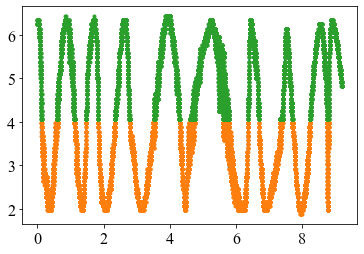

In [13]:
t = t05[0:46000]
v = V05[0:46000]

plt.plot(t, v)

tu = t[v>4]
vu = v[v>4]

tl = t[v<4]
vl = v[v<4]
    
plt.plot(tl, vl, '.')
plt.plot(tu, vu, '.')
#plt.plot(tl[])


In [14]:

def jumps(t1, t2, tolerance = 0.03) : 
    l1 = []
    l2 = []
    
    for (i,v) in enumerate(t1) : 
        previous = 0
        if i == 0 : 
            previous = v
        else : 
            previous = t1[i-1]
        if v - previous > tolerance : 
            l1.append(i-1)
            l1.append(i)
        
    for (i,v) in enumerate(t2) : 
        previous = 0
        if i == 0 : 
            previous = v
        else : 
            previous = t2[i-1]
        if v - previous > tolerance : 
            l2.append(i-1)
            l2.append(i)
    return l1, l2
    

20
[630, 631, 3292, 3293, 5125, 5126, 7322, 7323, 11134, 11135, 11149, 11150, 16218, 16219, 17896, 17897, 19470, 19471, 21997, 21998]


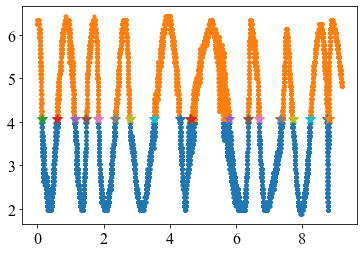

In [15]:
lu, ll = jumps(tu, vu)

plt.plot(tl, vl, '.')
plt.plot(tu, vu, '.')
for i in lu : 
    plt.plot(tu[i], vu[i], '*', markersize=10)
    
print(len(lu))
print(lu)
    
#for i in ll : 
 #   plt.plot(tl[i], vl[i], '+')

In [40]:
def anden(t, *p) : 
    a = p[0]
    b = p[1]
    c = p[2]
    return a*t**2+b*t+c

print(lu)

[630, 631, 3292, 3293, 5125, 5126, 7322, 7323, 11134, 11135, 11149, 11150, 16218, 16219, 17896, 17897, 19470, 19471, 21997, 21998]


20


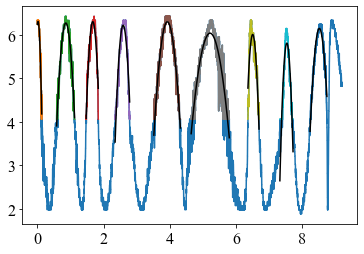

In [43]:
track = 0

t = t05[0:46000]
v = V05[0:46000]

plt.plot(t, v)

number = 0
for v in lu : 
    if v - track > 10 : 
        tlist = tu[track:v]
        Vlist = vu[track:v]
    
        plt.plot(tlist, Vlist)
    
        popt, pcov = curve_fit(anden, tlist, Vlist, p0=[1,1,1])
        t_fit = np.linspace(min(tlist), max(tlist), num = 100)
        V_fit = anden(t_fit, *popt)
        
        plt.plot(t_fit, V_fit, 'k')
        number += 1
    
    track = v + 1
    
print(number*2)

#  Savgol

In [198]:
from scipy.signal import savgol_filter

def extrema(liste) : 
    size = len(liste)
    checks = 11
    new_list = []
    
    for index in range(size-checks) : 
        if index == 0 : 
            continue 
        if index == size - checks : 
            continue
        if index == size - checks - 1 : 
            continue
        else : 
            #print(index)
            append = False
            # Minima
            for i in range(checks) : 
                #print(index)
                if liste[index-(i+1)] > liste[index] and liste[index+(i+1)] > liste[index] : 
                    append = True
            if append == True : 
                new_list.append(index)
                
            append = False
            # Maxima
            for i in range(checks) : 
                if liste[index-(i+1)] < liste[index] and liste[index+(i+1)] < liste[index] : 
                    append = True
            if append == True : 
                new_list.append(index)
            
            #if liste[index-1] > liste[index] and liste[index+1] > liste[index] : 
             #   if liste[index-2] > liste[index] and liste[index+2] > liste[index] : 
             #       new_list.append(index)
            # Maxima
            #if liste[index-1] < liste[index] and liste[index+1] < liste[index] : 
             #   if liste[index-2] < liste[index] and liste[index+2] < liste[index] : 
             #       new_list.append(index)
                
    return new_list


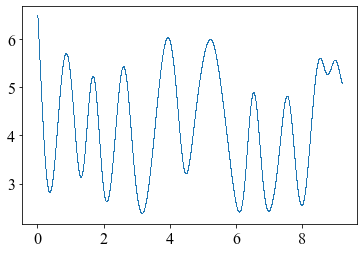

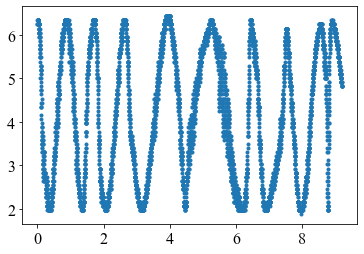

In [222]:
tlist = t05[0:46000:6]
Vlist = (V05[0:46000:6])


def sav(liste, step, grad) : 
    return savgol_filter(liste, step, grad)

x2 = sav(Vlist, 31, 1)
x3 = sav(x2, 31, 1)
x4 = sav(x3, 31 ,1)
x5 = sav(x4, 31, 1)

x = x2
for i in range(10) : 
    x = sav(x, 11*(2*i+1), 1)

x3 = extrema(Vlist)

#for i in x3 : 
 #   plt.plot(tlist[i], Vlist[i], '*')

#print(x3)

plt.plot(tlist, x, ',')

slope = np.gradient(Vfilter)

liste = []
#for (i, v) in enumerate(slope) : 
 #   tolerance = 0.0000000001
  #  if v < tolerance and v > -tolerance : 
   #     liste.append(i)
        
#for i in liste : 
 #   plt.plot(tlist[i], Vfilter[i], '*')
        
#print(len(liste))

fig, ax = plt.subplots()
ax.plot(tlist, Vlist, '.')

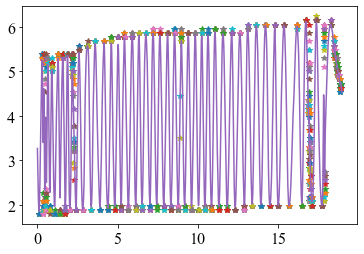

In [207]:
tlist = t2[0:95000:6]
vlist = V2[0:95000:6]

vsav = sav(vlist, 51, 1)

ex = extrema(vsav)

for i in ex : 
    plt.plot(tlist[i], vlist[i], '*')

plt.plot(tlist,vsav)